In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv("scopus.csv")

In [3]:
data["Authors"]

0       Karltun A., Karltun J., Coelho D.A., Havemose ...
1                                Andrade S.R., Walsh H.S.
2       Banerjee S., Potts C.M., Jhala A.H., Jaselskis...
3       Evenson K.R., LaJeunesse S., Keefe E., Naumann...
4                      Wang Q., Su T., Lau R.Y.K., Xie H.
                              ...                        
1661                      Rosengarten M., Ramachandran S.
1662                                  Wagh R.S., Anand D.
1663                                          Mitrovic S.
1664             Kot M.K., Spanagel F.F., Belozerova O.A.
1665    Schmalzried H.D., Fallon L.F., Keller E.A., Mc...
Name: Authors, Length: 1666, dtype: object

In [4]:
profile = ProfileReport(data, title="Profiling Report")

In [5]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [6]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [13]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [9]:
data.keys()

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Document Type',
       'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [10]:
titulos = str
for titulo in data["Author Keywords"]:
    titulos = str(titulo) + " " + str(titulos)
titulos

'emergency preparedness; local emergency management agency; Web site Digital technologies; Electronic document; Labour law of russia remote work Business intelligence; Data management; Digitalization; Economic analysis; Information quality Generation of training dataset; Legal information retrieval; Legal text segmentation; Natural language processing; Supervised learning Anomaly detection and localization; Integrated System Health Management; Self-Organizing Map Data integration; Data Integration Patterns; EDM; Enterprise data management; Enterprise data model; Enterprise Integration; Enterprise Integration Patterns; Entity model; OLTP; Online Transaction Processing; System integration ambulatory glucose profile; flash glucose monitoring; interstitial glucose; type 1 diabetes; type 2 diabetes Diffusion of innovation; Inland Revenue Department; Revenue Administration Management Information System Blockchain technology; Decentralized architecture; Double-spending; Hash function; Peer-to

In [15]:
stop_words = stopwords.words('english')

In [16]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [17]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [18]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [19]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [20]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
management,632
system,290
nan,224
information,210
data,193
learning,164
systems,160
blockchain,145
document,141
digital,134


In [21]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

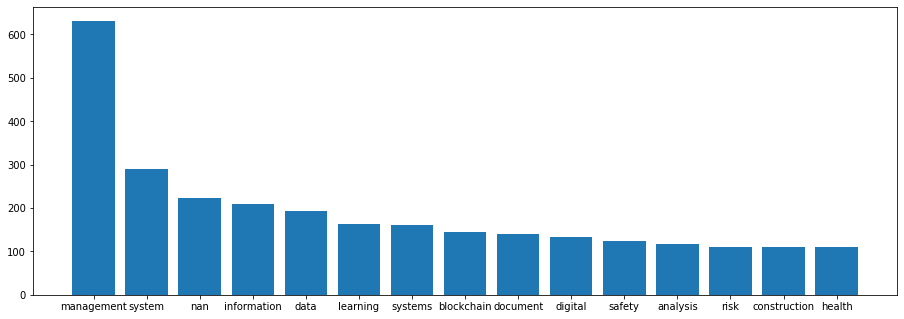

In [22]:
plot_bar(data=df, top=15)

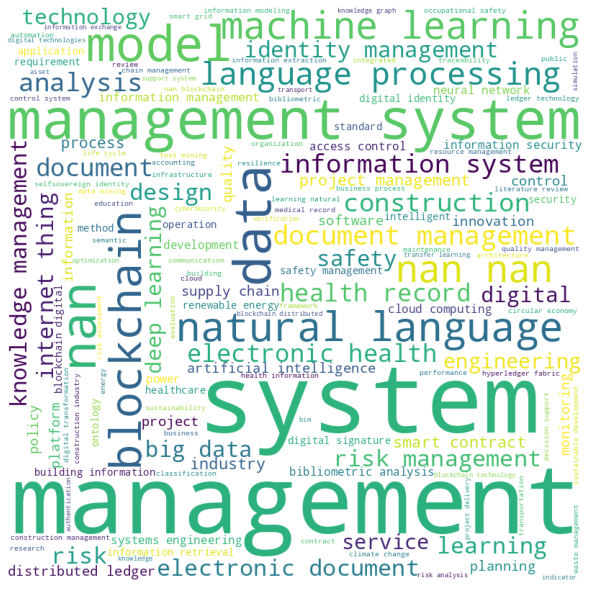

In [23]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
data.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,"Karltun A., Karltun J., Coelho D.A., Havemose ...",55183905200;6602521328;57200636000;58136676700...,The work of first line managers – A key to res...,2023,Applied Ergonomics,110,NaN,103993,NaN,NaN,...,Department of Supply Chain and Operations Mana...,"Karltun, A., Department of Supply Chain and Op...",First-line managers (FLMs) have a vital role i...,Coordination; Front-line staff ergonomics; Mom...,Engineering research; Human resource managemen...,Article,Final,NaN,Scopus,2-s2.0-85149771521
1,"Andrade S.R., Walsh H.S.",57354372800;57197854434;,Discovering a Failure Taxonomy for Early Desig...,2023,Journal of Computing and Information Science i...,23,3,031001,NaN,NaN,...,"HX5, LLC, Moffett Field, CA 94035, United Sta...","Andrade, S.R., HX5, LLC, Moffett Field, CA 94...",Methodologies for failure assessment frequentl...,design; failure analysis; failure mechanisms; ...,Data mining; Extraction; Failure (mechanical);...,Article,Final,NaN,Scopus,2-s2.0-85143991169
2,"Banerjee S., Potts C.M., Jhala A.H., Jaselskis...",57216571320;7006607707;15055824300;7003913037;,Developing a Construction Domain-Specific Arti...,2023,Journal of Computing in Civil Engineering,37,3,04023007,NaN,NaN,...,"Dept. of Civil Engineering and Construction, B...","Banerjee, S., Dept. of Civil Engineering and C...",Transportation agency personnel gain valuable ...,Construction industry; Knowledge management; L...,Computational linguistics; Construction indust...,Article,Final,NaN,Scopus,2-s2.0-85149490385
3,"Evenson K.R., LaJeunesse S., Keefe E., Naumann...",7006414128;54954814400;57602329500;57928207200;,Mixed-methods approach to describing Vision Ze...,2023,Accident Analysis and Prevention,184,NaN,107012,NaN,NaN,...,"Department of Epidemiology, Gillings School of...","Evenson, K.R., Department of Epidemiology, Gil...",Vision Zero (VZ) aims to reduce fatalities and...,Accident prevention; COVID-19; Qualitative res...,Highway accidents; Population statistics; Webs...,Article,Final,NaN,Scopus,2-s2.0-85148697010
4,"Wang Q., Su T., Lau R.Y.K., Xie H.",57866546100;58028246800;12794272900;57219619828;,DeepEmotionNet: Emotion mining for corporate p...,2023,Information Processing and Management,60,3,103151,NaN,NaN,...,"East China Normal University, Shanghai, China;...","Wang, Q., East China Normal University, Shangh...",Since previous studies in cognitive psychology...,Corporate financial performance; Deep learning...,Behavioral research; Data mining; Deep learnin...,Article,Final,NaN,Scopus,2-s2.0-85144601250
